In [353]:
import cv2
import numpy as np

import matplotlib.pyplot as plt


In [354]:
ls

Barcode_debag.ipynb  images/  README.md


In [372]:
# load the image and convert it to grayscale
image = cv.imread('images/18.jpg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

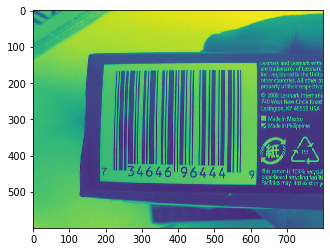

In [356]:
plt.imshow(gray)
plt.show()

In [357]:
# compute the Scharr gradient magnitude representation of the images
# in both the x and y direction
gradX = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)

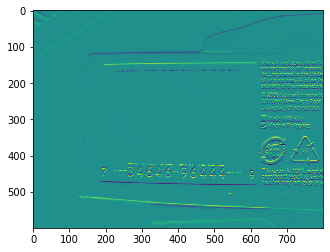

In [358]:
plt.imshow(gradY)
plt.show()

In [359]:
# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

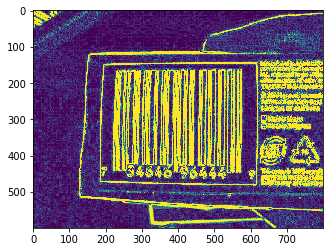

In [360]:
plt.imshow(gradient)
plt.show()

In [361]:
# blur and threshold the image
blurred = cv2.blur(gradient, (9, 9))
(_, thresh) = cv2.threshold(blurred, 180, 255, cv2.THRESH_BINARY)

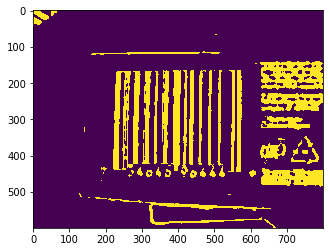

In [362]:
plt.imshow(thresh)
plt.show()

In [363]:
# construct a closing kernel and apply it to the thresholded image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

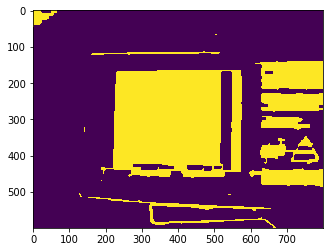

In [364]:
plt.imshow(closed)
plt.show()

In [365]:
# perform a series of erosions and dilations
closed = cv2.erode(closed, None, iterations = 4)
closed = cv2.dilate(closed, None, iterations = 4)

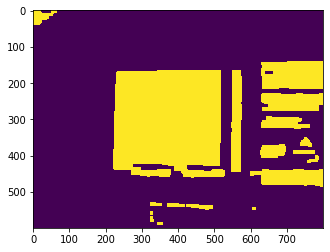

In [366]:
plt.imshow(closed)
plt.show()

In [367]:
# find the contours in the thresholded image, then sort the contours
# by their area, keeping only the largest one
(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
main = sorted(cnts, key = cv2.contourArea, reverse = True)[0]

In [368]:
main_shape = main.shape[0] 
main_shape = int(main_shape)# конвертируем в тип int

In [369]:
main_shape

132

In [370]:
main = main.reshape(main_shape,2)# создаём двумерный массив координат 

<function matplotlib.pyplot.show(*args, **kw)>

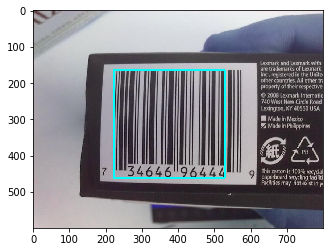

In [371]:
x1 = main.min(axis = 0)[0] #вычисляем координаты прямоугольника 
y1 = main.max(axis = 0)[1]
x2 = main.max(axis = 0)[0]
y2 = main.min(axis = 0)[1]

barzones = cv2.rectangle(image,(x1.astype(int),y1.astype(int)),(x2.astype(int),y2.astype(int)),(0,255,255),3) 
plt.imshow(barzones)
plt.show
#cv2.imwrite('photo/out.png',barzones) #save image